# Problem Statement:
Insurance Forecast by using Linear Regression

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In [603]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [604]:
#Loading Dataset
data=pd.read_csv('medical_cost_insurance.csv')

In [605]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [606]:
#Checking Shape
data.shape

(1338, 7)

In the dataset there are 1338 rows and 7 columns

In [607]:
#Checking Null Values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values present in the dataset

In [608]:
#Checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this we can see that column age,children are integer type.
Column sex,smoker,region are string type and
Column bmi and charhes are of float type

In [609]:
#Description of dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [610]:
#Checking for duplicates
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

we can see that previously 1338 rows were there, after removing duplicates it came down to 1337, that means there was one duplicate present

In [611]:
#Checking unique values of
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

There are people of different age group. Younger one is one wuth age 18years and elder one is one with age 64.

In [612]:
#Checking number of unique values present in age
data['age'].nunique()

47

So there are total of 47 diffrent age group people

In [613]:
data['age'].mean()

39.222139117427076

So 39.22 is the mean of the age

In [614]:
#Checking unique values for sex
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [615]:
#Checking unique values for bmi
data['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [616]:
#checking number of unique values present in bmi
data['bmi'].nunique()

548

In [617]:
#Checking unique values of children
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [618]:
#Checking unique values for smoker
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [619]:
#checking unique values for region
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [620]:
#checking the number of people present in different age group
data.age.value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Maximum people are of age group 18 years and minimum are of age group 22

In [621]:
#checking how many male and female are there
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

 Total number of male=675 female=662

In [622]:
#checking how the number of chuldrens or dependent
data.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In this we can see that most of the people that is 573 people does'nt have any children or dependent included in his or her insurance.
About 324 people have 1 children or dependent included in his or insurance.
About 240 people have 2 children or dependent included in his or insurance.
About 157 people have 3 children or dependent included in his or insurance.
About 25 people have 4 children or dependent included in his or insurance.
About 18 people have 5 children or dependent included in his or insurance.

In [623]:
#Chucking the number of people who are smokes and who does'nt smoke
data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

About 1063 people does not smoke.
And about 274 people smoke.

In [624]:
#Checking how many people are from particular regions
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

So about 364 people are from southeast region.
325 people are from southwest region.
and about 324 people are from northwest and northeast region.

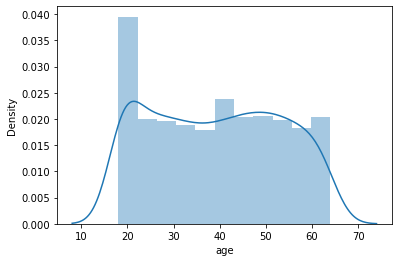

In [625]:
#Plotting distplot for age
sns.distplot(data['age'],kde=True)
plt.show()

In this we can see that the data isnormally distributed like.Further will check the skeewness.

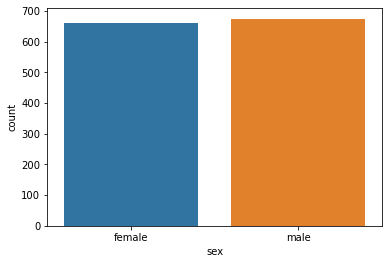

In [626]:
#plotting countplot for sex
sns.countplot(x='sex',data=data)
plt.show()

So we can see that males are little bit more than female.

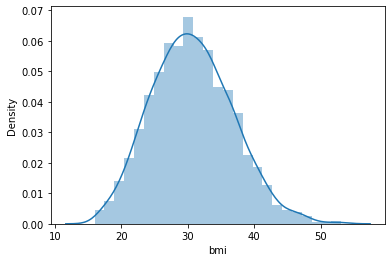

In [627]:
#plotting distplot for bmi
sns.distplot(data['bmi'],kde=True)
plt.show()

Data can be seen normally distributed.Further will check the skewness

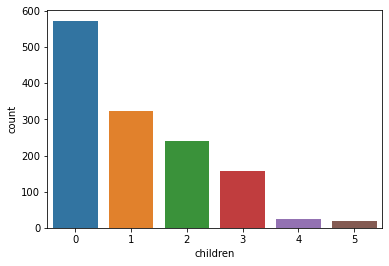

In [628]:
#Plotting countplot for region
sns.countplot(x='children',data=data)
plt.show()

As explained above we can see that most of the peopl does'nt have any children or dependent included in his her insurance.

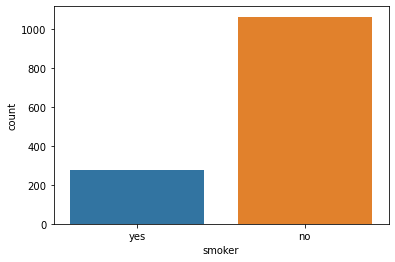

In [629]:
#Plotting countplot for smoker
sns.countplot(x='smoker',data=data)
plt.show()

So we can see that most of the people does not smoke 

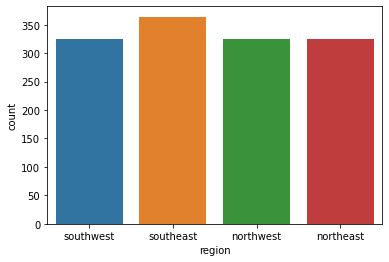

In [630]:
#Plotting countplot for region
sns.countplot(x='region',data=data)
plt.show()

So we can see that the most of the people are from southeast region

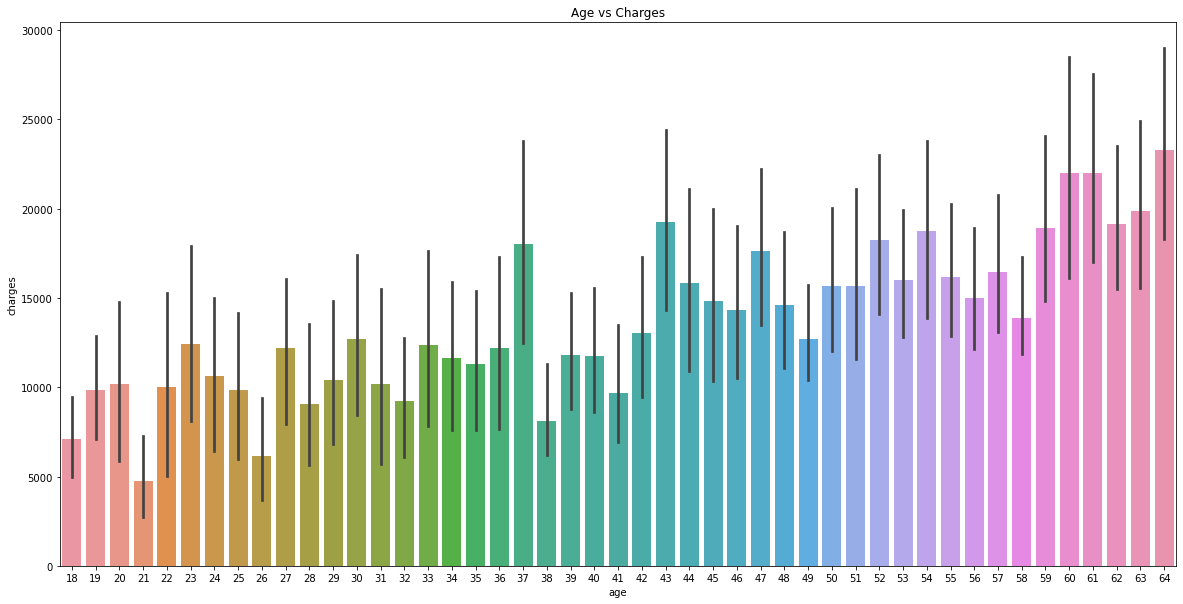

In [631]:
#Plotting Barplot for age and charges
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='charges',data=data)
plt.title('Age vs Charges')
plt.show()

In this we can see that as the person is getting older the charges starts increasing

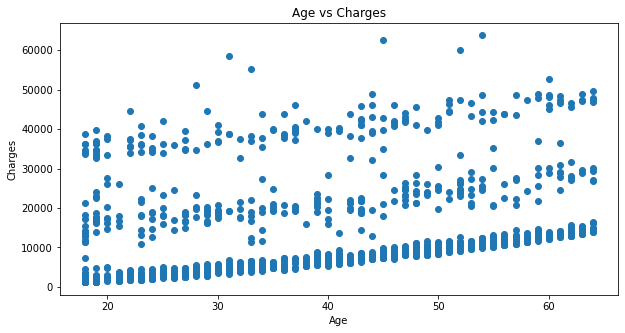

In [632]:
#plotting scatter plot for bmi and charges
plt.figure(figsize=(10,5))
plt.scatter(x='age',y='charges',data=data)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

So we can say like there is a relationship between age and charges

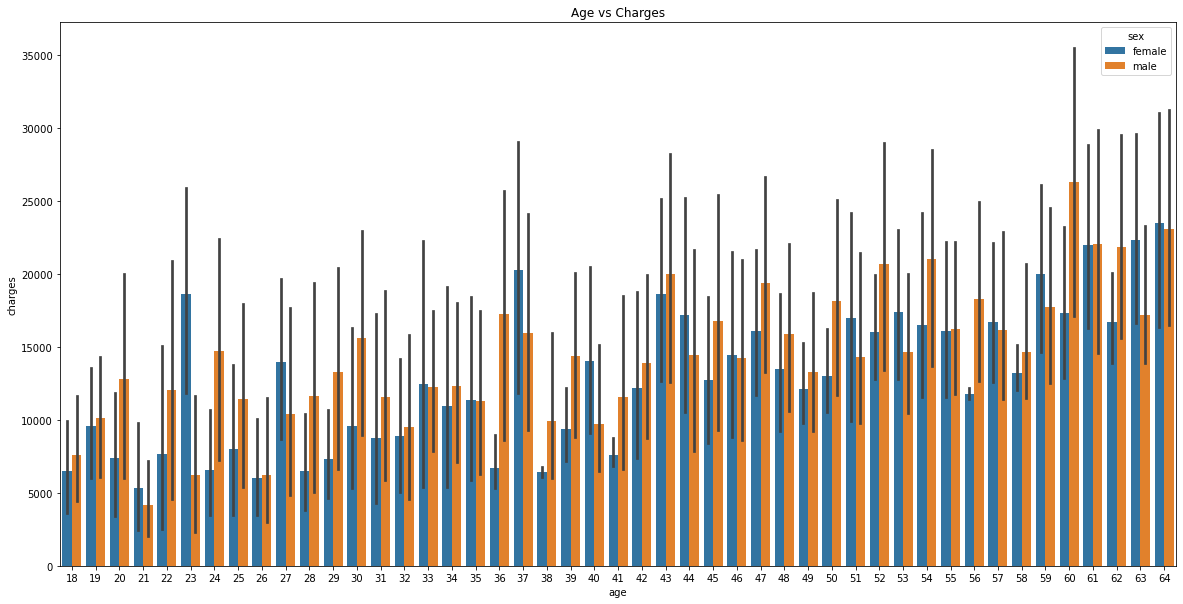

In [633]:
#Plotting Bar plot for Age and charges with hue as sex
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='charges',hue='sex',data=data)
plt.title('Age vs Charges')
plt.show()

This plot shows us about the charges of the males anf females accoridng to age

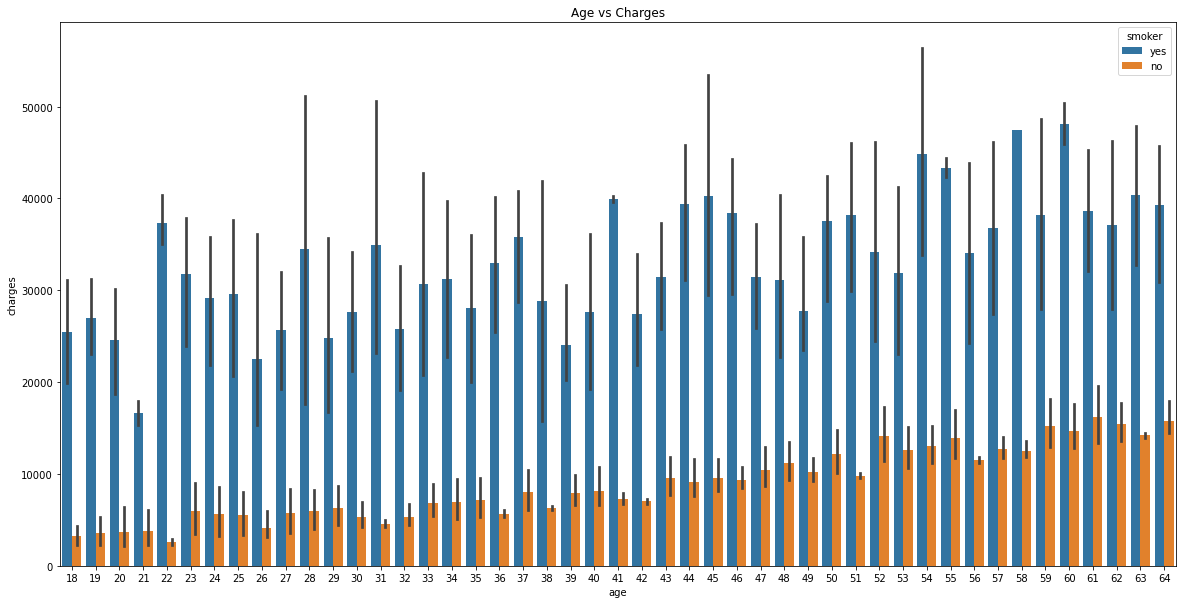

In [634]:
#Plottign Bar plot for Age and charges with hue as smoker
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='charges',hue='smoker',data=data)
plt.title('Age vs Charges')
plt.show()

In this we can see the diffrence of charges between the people who smokes and who does not smoke.So we can see like there is a rapid increase in the charges when the person smokes.

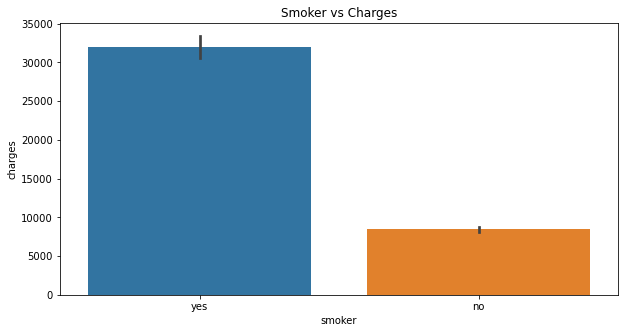

In [635]:
#Plotting Bar plot for smoker and cahrges
plt.figure(figsize=(10,5))
sns.barplot(x='smoker',y='charges',data=data)
plt.title('Smoker vs Charges')
plt.show()

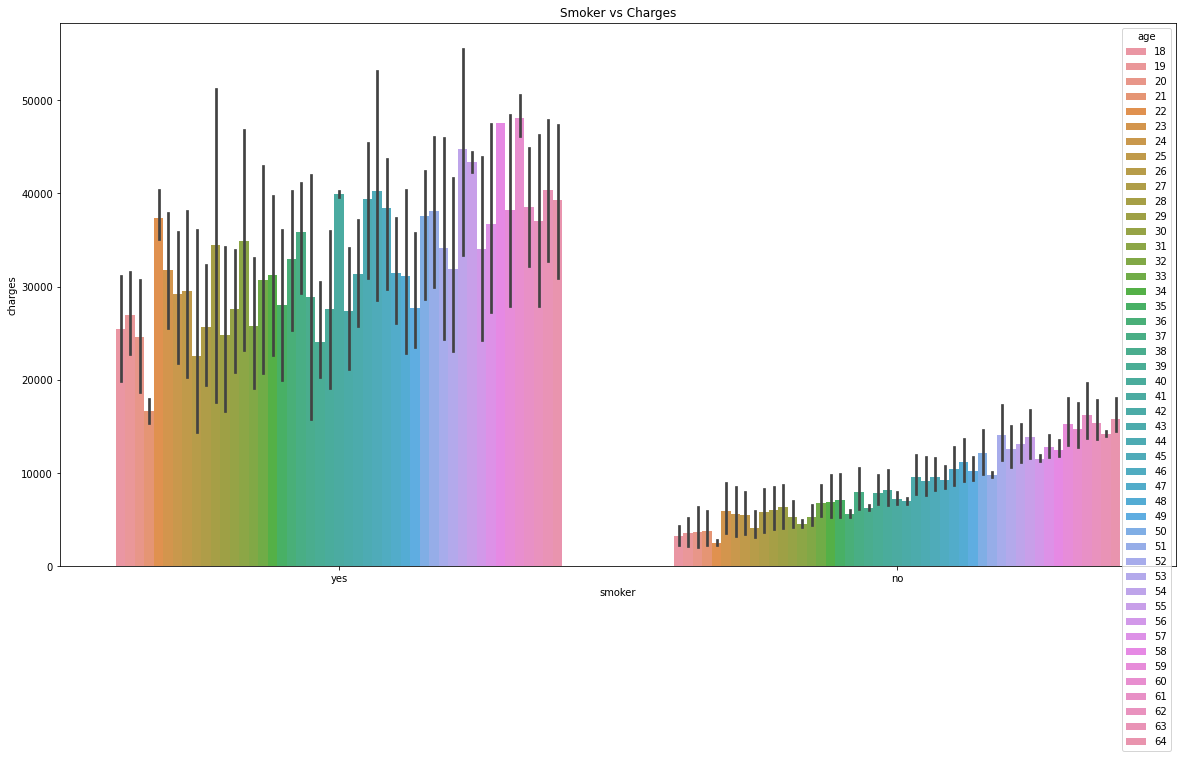

In [636]:
#plotting bar plot fro smoker and charges and hue as age
plt.figure(figsize=(20,10))
sns.barplot(x='smoker',y='charges',hue='age',data=data)
plt.title('Smoker vs Charges')
plt.show()

we can see that inspite of the people who are old and who does not smoke there charges are pretty less than the people who smoke

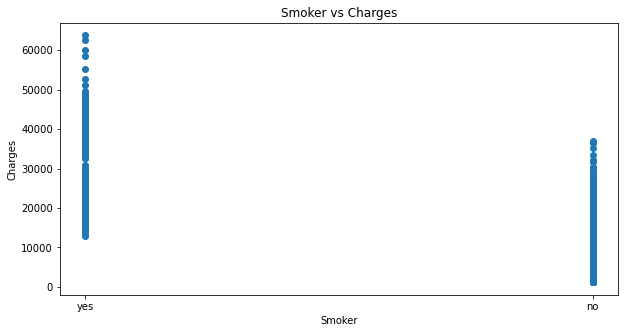

In [637]:
#plotting scatter plot for bmi and charges
plt.figure(figsize=(10,5))
plt.scatter(x='smoker',y='charges',data=data)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')
plt.show()

We can see that there is a relationship between smoker and charges as the charges increases if the person smokes, and the charges decreases with person does not smoke.

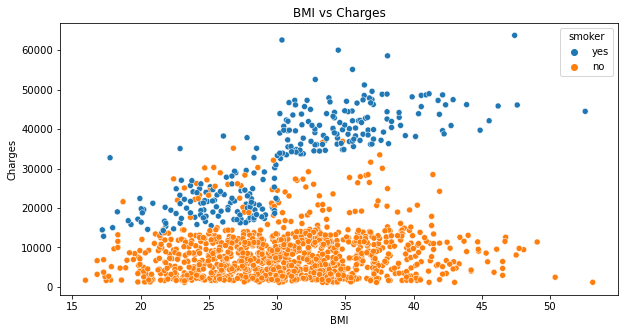

In [638]:
#plotting scatter plot for bmi and charges
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=data)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

In this we can see the scatter plot for bmi and charges.so in this we can say that there is a relationship between bmi and charges.And people who smokes with high bmi have more charges compared to the one who does not smoke

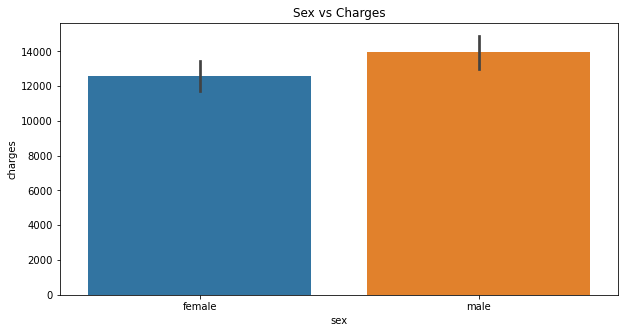

In [639]:
#Plotting bar plot for sex and charges
plt.figure(figsize=(10,5))
sns.barplot(x='sex',y='charges',data=data)
plt.title('Sex vs Charges')
plt.show()

In this we can see that the charges for male and female are more over same

In [640]:
#checking how many males and females are of particular age group
data.groupby('sex')['age'].value_counts()

sex     age
female  18     33
        19     33
        47     15
        48     15
        51     15
               ..
male    60     12
        61     11
        62     11
        63     11
        64     11
Name: age, Length: 94, dtype: int64

In [641]:
#Checking how many males and females smokes
data.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        516
        yes       159
Name: smoker, dtype: int64

About 547 females and 516 males does not smoke and about 115 females and 159 males smokes

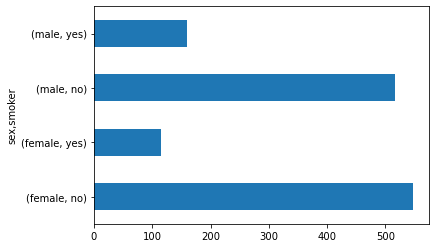

In [642]:
#Ploting barplot for sex and smoker
data.groupby('sex')['smoker'].value_counts().plot.barh()
plt.show()

Here we can clearly see that most of the male and females does not smoke.

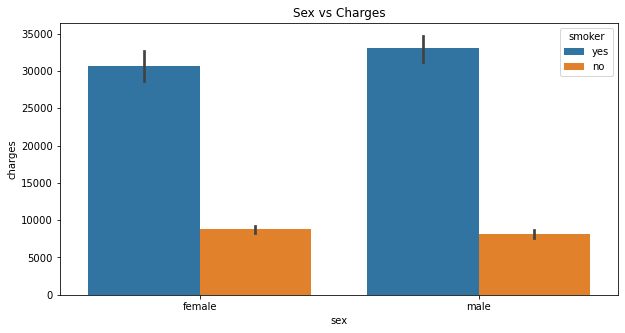

In [643]:
#Plotting bar plot for sex and charges with hue as smoker
plt.figure(figsize=(10,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=data)
plt.title('Sex vs Charges')
plt.show()

In this we can see that whether it is male or female if the person is smoking irrespective of the gender the charges are always high in comparison to the people who does not smoke.

In [644]:
#checking how many males and females are from particular regions
data.groupby('sex')['region'].value_counts()

sex     region   
female  southeast    175
        northwest    164
        southwest    162
        northeast    161
male    southeast    189
        northeast    163
        southwest    163
        northwest    160
Name: region, dtype: int64

So most of the females are from southeast region and most of the males are also from southeast region.
Least number of females and males are from northeast and northwest respectively.

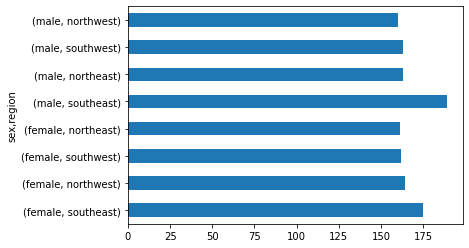

In [645]:
#plotting barplot for sex and region
data.groupby('sex')['region'].value_counts().plot.barh()
plt.show()

so we can see that most of the males and females are from southeast

In [646]:
#Checking the number of males and females who smokes more are from which region
data.groupby('sex')['smoker','region'].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
                northeast    132
        yes     southeast     36
                northeast     29
                northwest     29
                southwest     21
male    no      southeast    134
                northwest    131
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
                northwest     29
dtype: int64

Most of the females and males who does not smoke are from southwest and southeast respectively.
Least of the females and males who does not smoke are northeast.
Most of the females and males who smoke are from southeast.
Least of the females and males who smoke are from southwest and northwest respectively.

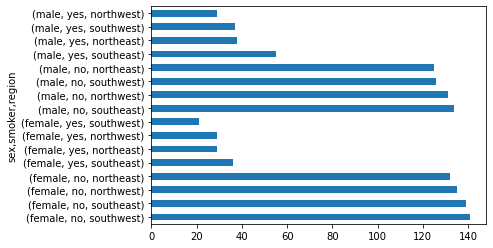

In [647]:
#Plotting barplot for sex,smoker and region
data.groupby('sex')['smoker','region'].value_counts().plot.barh()
plt.show()

so we can clearly see that most of the  males and females who does not smoke are from southeast and southwest respectively.
and the most of the males and females who smoke are from southeast.

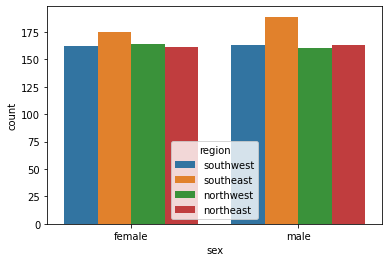

In [648]:
#Plotting bar plot for sex and charges with hue as smoker
sns.countplot(x='sex',hue='region',data=data)
plt.show()

so we can see that most of the males and females are from southeast

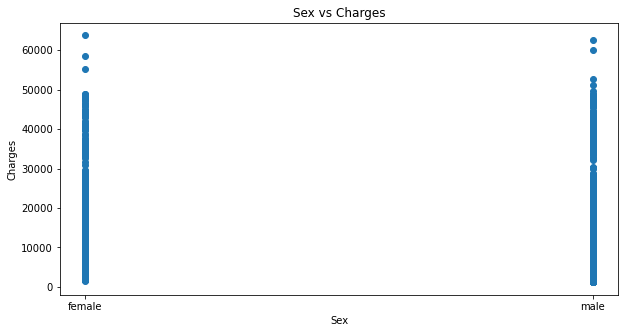

In [649]:
#plotting scatter plot for bmi and charges
plt.figure(figsize=(10,5))
plt.scatter(x='sex',y='charges',data=data)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Sex vs Charges')
plt.show()

It does not look like any relationship is there between sex and the charges. we will confirm it while checking correlation.

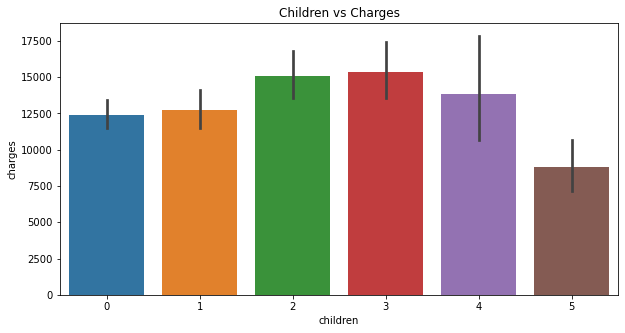

In [650]:
#Plotting bar plot for sex and charges with hue as smoker
plt.figure(figsize=(10,5))
sns.barplot(x='children',y='charges',data=data)
plt.title('Children vs Charges')
plt.show()

This shows the charges of people who has children or dependent included in his/her insurance

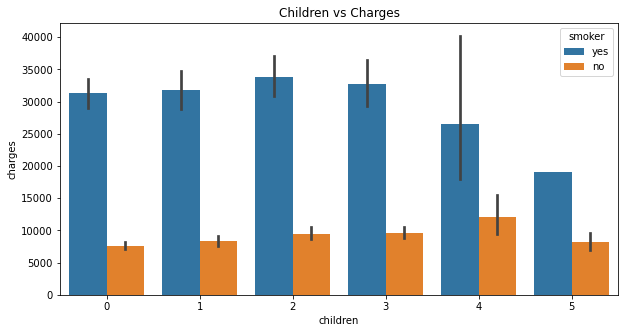

In [651]:
#Plotting bar plot for sex and charges with hue as smoker
plt.figure(figsize=(10,5))
sns.barplot(x='children',y='charges',hue='smoker',data=data)
plt.title('Children vs Charges')
plt.show()

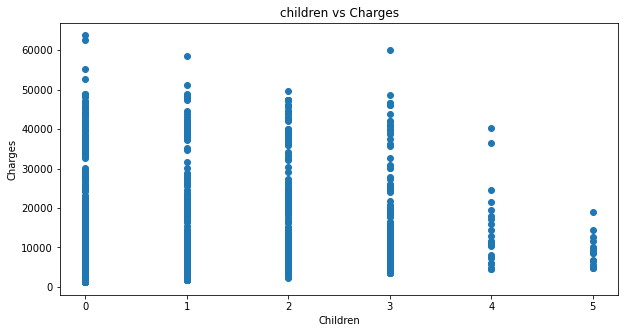

In [652]:
#plotting scatter plot for bmi and charges
plt.figure(figsize=(10,5))
plt.scatter(x='children',y='charges',data=data)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('children vs Charges')
plt.show()

It looks like there is a little bit relationship of children with charges.

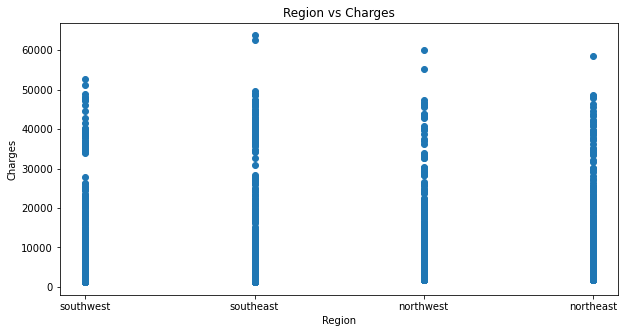

In [653]:
#plotting scatter plot for bmi and charges
plt.figure(figsize=(10,5))
plt.scatter(x='region',y='charges',data=data)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')
plt.show()

It does not look like thre is any relationship of region with charges.

In [654]:
#Checking the mean of the charges who smoke and who does not smoke
data.groupby('smoker')[['charges']].mean()

,charges
smoker,
no,8440.660307
yes,32050.231832


In this we can see that mean of the charges who smoke 32050 and who does not smoke is 8440.

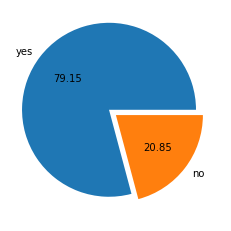

In [655]:
#Plotting pie chart to visualize the mean percentage of charges who smoke and who does not smoke
smoker=['yes','no']
x=[32050.231832,8440.660307]
plt.pie(x,labels=smoker,autopct='%.2f',explode=[0.1,0])
plt.show()

In this we can see that the people who smoke have to appox 3-4 times more than the people who does not smoke.

In [656]:
#Checking the mean of the charges as per to region wise
data.groupby('region')[['charges']].mean()

,charges
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


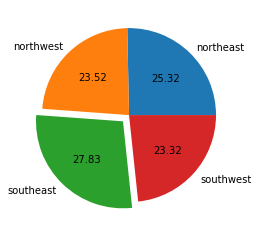

In [657]:
#Plotting pie chart to visualize the mean percentage of charges as per to regions
regions=['northeast','northwest','southeast','southwest']
x=[13406.384516,12450.840844,14735.411438,12346.937377]
plt.pie(x,labels=regions,autopct='%.2f',explode=[0,0,0.1,0])
plt.show()

In [658]:
#Since column Sex and Embarked have categorical values so using label encoder to encode
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [659]:
#Encoding column Sex, smoker and region
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['sex'])
df1=lab_enc.fit_transform(data['smoker'])
df2=lab_enc.fit_transform(data['region'])

In [660]:
#Transfering data to column Sex, column smoker and column region
data['sex']=df
data['smoker']=df1
data['region']=df2

In [661]:
#Checking whether the data is encoded or not
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


As we can see that the data has been encoded

In [662]:
#Checking correlation
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


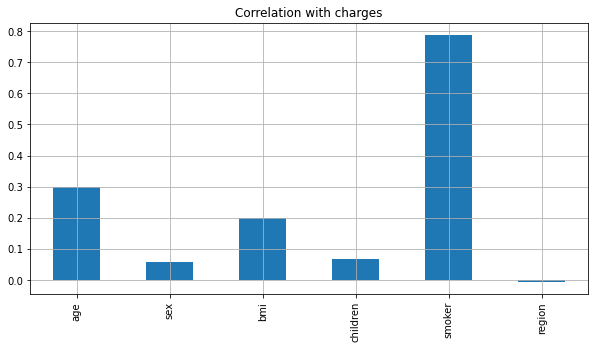

In [663]:
#Plotting correlation
data.drop(['charges'],axis=1).corrwith(data['charges']).plot(kind='bar',grid=True,figsize=(10,5),title='Correlation with charges')
plt.show()


As we can see that region and sex are very less correlated with the charges.
And smoker is highly correlated with the charges.

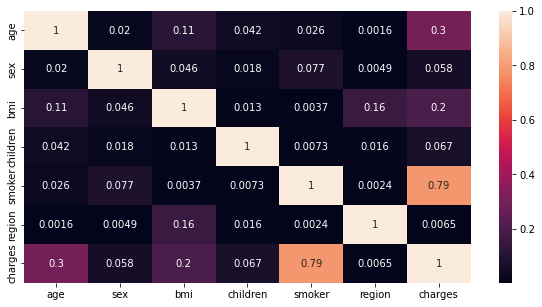

In [664]:
#Plotting Heatmap
corr=data.corr().abs()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)
plt.show()

In [665]:
#Checking skewness
data.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

For skewness we will check for the column who has continuous data.There are two columns i.e Age and BMI.
so as we can see that in both the column that is age and bmi we did not find any skewness meaning there values are between 0.5 to -0.5.

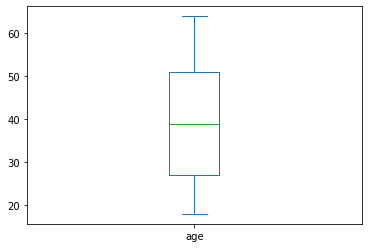

In [666]:
#Checking for outliers in age
data['age'].plot.box()
plt.show()

There are no outliers present in age

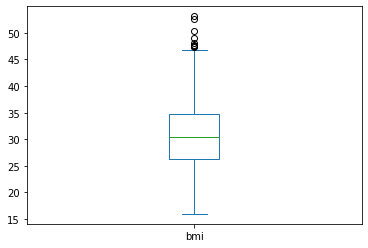

In [667]:
#Checking for outliers in bmi
data['bmi'].plot.box()
plt.show()

We can see some outliers present in the bmi.

In [668]:
#Removing outliers
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [669]:
#Finding the value of bmi from where outliers starts
bmi_high=q3.bmi+(1.5*iqr.bmi)
bmi_high

47.31500000000001

In [670]:
#Checking and location how many of the outliers are present
bmi=np.where(data['bmi']>bmi_high)
bmi

(array([ 116,  286,  401,  543,  846,  859, 1046, 1087, 1316], dtype=int64),)

In [671]:
#Dropping the index which we found as outliers
data=data.drop(data.index[bmi])
data.shape

(1328, 7)

previously 1337 rows were there now it came down to 1328, that means we have successfully removed outliers.

In [672]:
#Reseting the index
data.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1323,1333,50,1,30.970,3,0,1,10600.54830
1324,1334,18,0,31.920,0,0,0,2205.98080
1325,1335,18,0,36.850,0,0,2,1629.83350
1326,1336,21,0,25.800,0,0,3,2007.94500


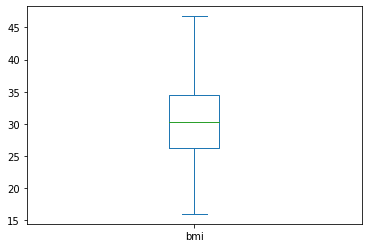

In [673]:
#Checking for outliers in bmi
data['bmi'].plot.box()
plt.show()

Now we can see that there are no outliers in bmi

In [674]:
#Dividing dataset into features and label
#Features
x=data.drop(['charges'],axis=1)
#Label
y=data['charges']

In [675]:
#Importing required libraries
from sklearn.preprocessing import StandardScaler

In [676]:
#using standardization method to standardize the data
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[-1.4404286 , -1.00755869, -0.44549526, -0.90856337,  1.97493519,
         1.34344665],
       [-1.51166949,  0.99249802,  0.5460678 , -0.08044247, -0.50634573,
         0.4396487 ],
       [-0.79926057,  0.99249802,  0.41599905,  1.57579935, -0.50634573,
         0.4396487 ],
       ...,
       [-1.51166949, -1.00755869,  1.06634279, -0.90856337, -0.50634573,
         0.4396487 ],
       [-1.29794681, -1.00755869, -0.80022821, -0.90856337, -0.50634573,
         1.34344665],
       [ 1.55168884, -1.00755869, -0.24785833, -0.90856337,  1.97493519,
        -0.46414925]])

In [677]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# LINEAR REGRESSION

In [678]:
#Initiating Logistic Regression
lr=LinearRegression()

In [679]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 75.47483554965604
at random state 0, testing accuracy is 73.4473886578041


at random state 1, training accuracy is 73.9440998830866
at random state 1, testing accuracy is 77.09780366396869


at random state 2, training accuracy is 74.26165246212118
at random state 2, testing accuracy is 76.74255169779069


at random state 3, training accuracy is 73.51304005114244
at random state 3, testing accuracy is 78.63429784788498


at random state 4, training accuracy is 74.75169723449429
at random state 4, testing accuracy is 75.01055458383436


at random state 5, training accuracy is 75.32643689290384
at random state 5, testing accuracy is 73.69605913276192


at random state 6, training accuracy is 74.6044227555254
at random state 6, testing accuracy is 75.83600635311728


at random state 7, training accuracy is 75.72191608044314
at random state 7, testing accuracy is 72.77435404878976


at random state 8, training accuracy is 74.9530254626662
at random 

Taking the random state=5

In [680]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=14)


In [681]:
#Training the data
lr.fit(x_train,y_train)

LinearRegression()

In [682]:
pred=lr.predict(x_train)
y_pred=lr.predict(x_test)

In [683]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 74.9933746620502

 Testing Score: 74.76478912985338


In [684]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [685]:
#Checking cross validation score for linear Regression
for j in range(2,6):
    cv_score=cross_val_score(lr,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.7478164228441967and accuracy for the testing is 0.7476478912985338


at cross fold 3 the cv score is0.7438853344439967and accuracy for the testing is 0.7476478912985338


at cross fold 4 the cv score is0.7445349120202628and accuracy for the testing is 0.7476478912985338


at cross fold 5 the cv score is0.7464099135301828and accuracy for the testing is 0.7476478912985338




By looking at the output i will be talking cv=5.

In [686]:
#imporing libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [687]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

4138.379511886612

In [688]:
#mean squared error
mean_squared_error(y_test,y_pred)

35744205.46160799

In [689]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

5978.645788270785

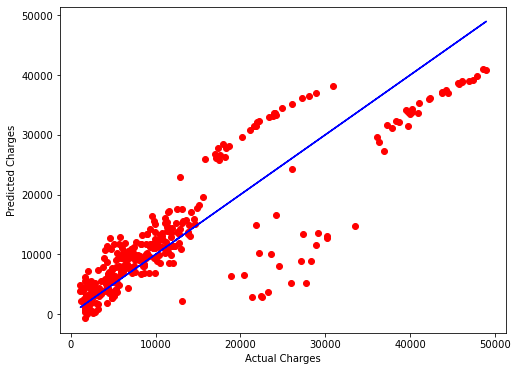

In [691]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

# RANDOM FOREST

In [761]:
#Instantiating model
rf=RandomForestRegressor()

In [762]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f'At Random state {i}, Training score is {metrics.r2_score(y_train,pred)*100}')
    print(f'At Random state {i}, Testing score is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

At Random state 0, Training score is 97.58864626092485
At Random state 0, Testing score is 83.3774022143072


At Random state 1, Training score is 97.46265164377434
At Random state 1, Testing score is 85.39959355259069


At Random state 2, Training score is 97.64566872469783
At Random state 2, Testing score is 84.53116037107553


At Random state 3, Training score is 97.53591693070442
At Random state 3, Testing score is 86.05411105363918


At Random state 4, Training score is 97.66258653123843
At Random state 4, Testing score is 83.58172792903724


At Random state 5, Training score is 97.75852832288302
At Random state 5, Testing score is 82.16026928297437


At Random state 6, Training score is 97.47989784565759
At Random state 6, Testing score is 87.2021579901422


At Random state 7, Training score is 97.55621314053656
At Random state 7, Testing score is 83.67118408440645


At Random state 8, Training score is 97.4765786185813
At Random state 8, Testing score is 85.5360248550021


At Ra

Taking the random state=6

In [763]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=6)

In [764]:
#Training the Model
rf.fit(x_train,y_train)

RandomForestRegressor()

In [765]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [766]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 97.36182632695099

 Testing Score: 86.86612255466152


In [767]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [768]:
#Checking cross validation score for linear Regression
for j in range(2,6):
    cv_score=cross_val_score(rf,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.8340508516247518and accuracy for the testing is 0.8686612255466152


at cross fold 3 the cv score is0.8314825126746075and accuracy for the testing is 0.8686612255466152


at cross fold 4 the cv score is0.8258479342007703and accuracy for the testing is 0.8686612255466152


at cross fold 5 the cv score is0.8340374670477942and accuracy for the testing is 0.8686612255466152




By looking at the output i will be talking cv=5.

In [769]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

2376.0363934970137

In [770]:
#mean squared error
mean_squared_error(y_test,y_pred)

18322105.00174049

In [771]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

4280.432805422892

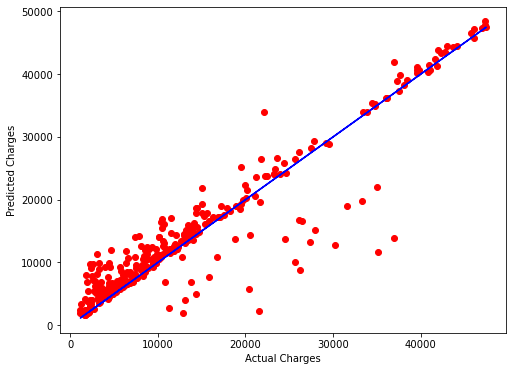

In [772]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

# ADA BOOST

In [704]:
#Instantiating Model
ada=AdaBoostRegressor()

In [705]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    ada.fit(x_train,y_train)
    pred=ada.predict(x_train)
    y_pred=ada.predict(x_test)
    print(f'At Random state {i}, Training score is {metrics.r2_score(y_train,pred)*100}')
    print(f'At Random state {i}, Testing score is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

At Random state 0, Training score is 83.87613420272166
At Random state 0, Testing score is 83.66927840679038


At Random state 1, Training score is 82.07607352264938
At Random state 1, Testing score is 84.31865726949891


At Random state 2, Training score is 84.0999297423199
At Random state 2, Testing score is 85.77077450293848


At Random state 3, Training score is 80.54168858631799
At Random state 3, Testing score is 81.15581332906638


At Random state 4, Training score is 81.73033931883592
At Random state 4, Testing score is 80.00769261593271


At Random state 5, Training score is 81.52673153950698
At Random state 5, Testing score is 78.15641408119625


At Random state 6, Training score is 80.64004283614904
At Random state 6, Testing score is 80.59775360677301


At Random state 7, Training score is 84.07588089618204
At Random state 7, Testing score is 81.74030921392473


At Random state 8, Training score is 83.6542452035149
At Random state 8, Testing score is 83.58220388658182


At 

Taking the random state=0

In [706]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [708]:
#Training the Model
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [709]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [711]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 83.63809234106103

 Testing Score: 81.10301038961435


In [712]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [713]:
#Checking cross validation score for linear Regression
for j in range(2,6):
    cv_score=cross_val_score(ada,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.8134651057056144and accuracy for the testing is 0.8110301038961435


at cross fold 3 the cv score is0.8088745048574112and accuracy for the testing is 0.8110301038961435


at cross fold 4 the cv score is0.809983122101744and accuracy for the testing is 0.8110301038961435


at cross fold 5 the cv score is0.8215712107502775and accuracy for the testing is 0.8110301038961435




By looking at the output i will be talking cv=3.

In [715]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

4018.1343388910263

In [716]:
#mean squared error
mean_squared_error(y_test,y_pred)

28980905.32560572

In [717]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

5383.39161919377

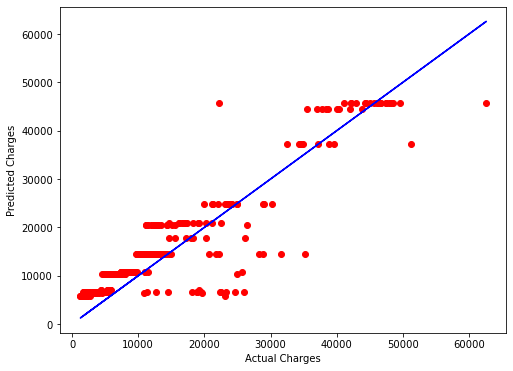

In [718]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

# GRADIENT BOOSTING

In [719]:
#Instantiating Model
gbd=GradientBoostingRegressor()

In [720]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    gbd.fit(x_train,y_train)
    pred=gbd.predict(x_train)
    y_pred=gbd.predict(x_test)
    print(f'At Random state {i}, Training score is {metrics.r2_score(y_train,pred)*100}')
    print(f'At Random state {i}, Testing score is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

At Random state 0, Training score is 90.52108760955896
At Random state 0, Testing score is 85.6748539220067


At Random state 1, Training score is 90.25182556893816
At Random state 1, Testing score is 87.07073088703059


At Random state 2, Training score is 90.65549641740489
At Random state 2, Testing score is 86.12635573533069


At Random state 3, Training score is 89.60748672869164
At Random state 3, Testing score is 88.59712738408896


At Random state 4, Training score is 90.78969628567104
At Random state 4, Testing score is 84.74807446092679


At Random state 5, Training score is 90.74939508806762
At Random state 5, Testing score is 84.59654130183036


At Random state 6, Training score is 89.6653283465384
At Random state 6, Testing score is 88.08278244046909


At Random state 7, Training score is 90.44750037717792
At Random state 7, Testing score is 85.08191296848591


At Random state 8, Training score is 90.68795419395443
At Random state 8, Testing score is 86.8699861741908


At R

Taking the random state=1

In [721]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [722]:
#Training the Model
gbd.fit(x_train,y_train)

GradientBoostingRegressor()

In [723]:
pred=gbd.predict(x_train)
y_pred=gbd.predict(x_test)

In [724]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 90.25182556893816

 Testing Score: 87.05779927528269


In [725]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [726]:
#Checking cross validation score for linear Regression
for j in range(2,6):
    cv_score=cross_val_score(gbd,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.8462708445684473and accuracy for the testing is 0.8705779927528269


at cross fold 3 the cv score is0.85078081131044and accuracy for the testing is 0.8705779927528269


at cross fold 4 the cv score is0.8486562027981075and accuracy for the testing is 0.8705779927528269


at cross fold 5 the cv score is0.8531443715557101and accuracy for the testing is 0.8705779927528269




By looking at the output i will be talking cv=5.

In [727]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

2579.426838730397

In [728]:
#mean squared error
mean_squared_error(y_test,y_pred)

21219116.02940905

In [729]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

4606.421173688859

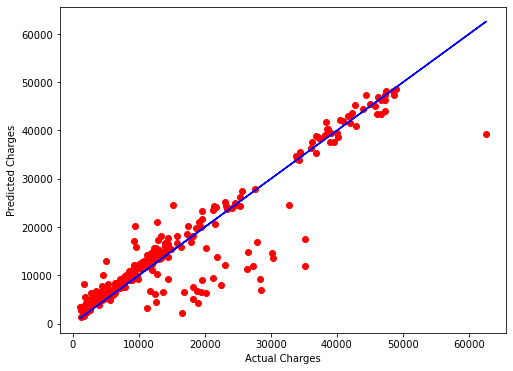

In [730]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [773]:
#Making Dataframe of all models
models=pd.DataFrame({
    'Models':['Linear Regression','Random Forest','Ada Boost','Gradient Boosting'],
    'Training Score':[74.99,97.31,83.63,90.87],
    'Testing Score':[74.76,86.86,81.10,87.05],
    'Cross Val Score':[74.64,83.36,80.88,85.31],
    'RMSE':[5798.64,4280.96,5383.39,4606.42]
     })
models
    

,Models,Training Score,Testing Score,Cross Val Score,RMSE
0,Linear Regression,74.99,74.76,74.64,5798.64
1,Random Forest,97.31,86.86,83.36,4280.96
2,Ada Boost,83.63,81.10,80.88,5383.39
3,Gradient Boosting,90.87,87.05,85.31,4606.42


Since the RMSE score is less for random forest i will go with model Random Forest Classifier

In [774]:
#Using Grid Search cv for hyperparameter tuning for RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [775]:
param_grid=({
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
})

In [776]:
grid_search=GridSearchCV(rf,param_grid=param_grid,cv=5)

In [777]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [778]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [779]:
#Training with the best parameters
rf=RandomForestRegressor(criterion='mse',max_depth=4,max_features='auto',n_estimators=200)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=4, max_features='auto',
                      n_estimators=200)

In [780]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 97.36182632695099

 Testing Score: 86.86612255466152


In [781]:
#Cross validation SCore
cv_score=cross_val_score(gbd,x_scaler,y,cv=5).mean()
cv_score

0.8532421224397444

Since there is no more of difference between r2(testing score) and cross validation score this model is good

In [782]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rf,open('Medical Cost Insurance','wb'))